# Feature Extraction and Engineering

In [5]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

import numpy as np
import pandas as pd 

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [6]:
import zipfile

In [7]:
zf = zipfile.ZipFile('data/mahindra.zip')

In [8]:
ctr = pd.read_csv(zf.open('test.csv'))

In [9]:
ctr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [10]:
ctr_id = [x for x in ctr.columns if x.endswith('id')]

In [11]:
ctr_id 

['reservation_id', 'persontravellingid', 'memberid', 'resort_id']

In [12]:
for i in ctr_id:
    ctr.drop(i, axis = 1, inplace = True)

In [14]:
nums = lambda x: x.replace('/','')

In [15]:
ctr

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code
0,05/04/18,05/04/18,06/04/18,3,2,2,0,3,3,4,1,2.0,2.0,3,3,H,1,A,C
1,24/05/15,23/06/15,27/06/15,1,2,4,0,1,1,4,8,2.0,2.0,4,2,H,1,F,A
2,21/07/15,07/08/15,10/08/15,3,2,3,0,2,2,2,3,4.0,2.0,2,3,H,1,D,A
3,31/07/15,22/10/15,25/10/15,1,2,3,0,1,1,2,3,2.0,2.0,6,3,H,1,F,A
4,01/07/16,01/10/16,05/10/16,1,2,4,0,1,2,3,8,2.0,2.0,11,2,H,1,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146760,20/02/19,21/02/19,22/02/19,1,3,2,0,1,1,3,1,4.0,10.0,1,2,E,1,E,A
146761,21/02/19,21/02/19,22/02/19,3,4,3,0,2,2,2,1,3.0,13.0,2,4,B,1,D,A
146762,23/02/19,24/02/19,26/02/19,1,1,5,0,1,1,2,4,4.0,3.0,6,3,F,1,F,A
146763,26/02/19,01/03/19,02/03/19,1,7,2,2,3,3,3,2,3.0,5.0,3,4,I,1,A,A


In [16]:
for i in ctr.columns:
    ctr[i] = ctr[i].apply(nums)

AttributeError: 'int' object has no attribute 'replace'

In [17]:
for i in ctr.columns:
    ctr[i] = ctr[i].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [18]:
ctr.shape

(146765, 19)

In [19]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   booking_date              146765 non-null  int64  
 1   checkin_date              146765 non-null  int64  
 2   checkout_date             146765 non-null  int64  
 3   channel_code              146765 non-null  int64  
 4   main_product_code         146765 non-null  int64  
 5   numberofadults            146765 non-null  int64  
 6   numberofchildren          146765 non-null  int64  
 7   resort_region_code        146765 non-null  int64  
 8   resort_type_code          146765 non-null  int64  
 9   room_type_booked_code     146765 non-null  int64  
 10  roomnights                146765 non-null  int64  
 11  season_holidayed_code     146730 non-null  float64
 12  state_code_residence      144505 non-null  float64
 13  state_code_resort         146765 non-null  i

In [73]:
for e in ctr.select_dtypes('object').columns:
    ctr[e] = ctr[e].astype('category')

ctr.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   booking_date              146765 non-null  category
 1   checkin_date              146765 non-null  category
 2   checkout_date             146765 non-null  category
 3   channel_code              146765 non-null  int64   
 4   main_product_code         146765 non-null  int64   
 5   numberofadults            146765 non-null  int64   
 6   numberofchildren          146765 non-null  int64   
 7   persontravellingid        146765 non-null  int64   
 8   resort_region_code        146765 non-null  int64   
 9   resort_type_code          146765 non-null  int64   
 10  room_type_booked_code     146765 non-null  int64   
 11  roomnights                146765 non-null  int64   
 12  season_holidayed_code     146730 non-null  float64 
 13  state_code_residence      144

In [128]:
for e in ctr.select_dtypes('integer').columns:
    ctr[e] = pd.to_numeric(ctr[e], downcast = 'integer')
ctr.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   booking_date              0 non-null       float64
 1   checkin_date              0 non-null       float64
 2   checkout_date             0 non-null       float64
 3   channel_code              146765 non-null  int8   
 4   main_product_code         146765 non-null  int8   
 5   numberofadults            146765 non-null  int8   
 6   numberofchildren          146765 non-null  int8   
 7   persontravellingid        146765 non-null  int16  
 8   resort_region_code        146765 non-null  int8   
 9   resort_type_code          146765 non-null  int8   
 10  room_type_booked_code     146765 non-null  int8   
 11  roomnights                146765 non-null  int8   
 12  season_holidayed_code     146730 non-null  float64
 13  state_code_residence      144505 non-null  f

In [129]:
for e in ctr.select_dtypes('float').columns:
    ctr[e] =  pd.to_numeric(ctr[e], downcast = 'float')
    
ctr.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   booking_date              0 non-null       float32
 1   checkin_date              0 non-null       float32
 2   checkout_date             0 non-null       float32
 3   channel_code              146765 non-null  int8   
 4   main_product_code         146765 non-null  int8   
 5   numberofadults            146765 non-null  int8   
 6   numberofchildren          146765 non-null  int8   
 7   persontravellingid        146765 non-null  int16  
 8   resort_region_code        146765 non-null  int8   
 9   resort_type_code          146765 non-null  int8   
 10  room_type_booked_code     146765 non-null  int8   
 11  roomnights                146765 non-null  int8   
 12  season_holidayed_code     146730 non-null  float32
 13  state_code_residence      144505 non-null  f

In [27]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.tree import DecisionTreeRegressor as DTR #Seleccion de caracteristicas

In [28]:
y = ctr.pop('roomnights')

KeyError: 'roomnights'

In [29]:
X = ctr.copy()

In [30]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.15)

In [31]:
print(X_train.shape,'\n',X_test.shape,'\n', y_train.shape,'\n', y_test.shape)

(124750, 18) 
 (22015, 18) 
 (124750,) 
 (22015,)


In [32]:
from sklearn import svm

In [45]:
estimador = LinReg()

In [49]:
selector = RFE(estimador, n_features_to_select= 5, step = 1)

In [50]:
X_train.fillna(0, inplace= True)
y_train.fillna(0, inplace = True)

In [51]:
selector = selector.fit(X_train,y_train)

In [52]:
selector.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(),
 'n_features_to_select': 5,
 'step': 1,
 'verbose': 0}

In [53]:
selector.ranking_

array([ 9, 10, 11,  3,  2,  1,  1,  5,  7,  1,  4,  8,  6,  1, 12,  1, 13,
       14])

In [54]:
X_train[X_train.columns[-1]]

140013    0.0
81936     0.0
122375    0.0
144141    0.0
77230     0.0
         ... 
9299      0.0
122953    0.0
125077    0.0
39107     0.0
62531     0.0
Name: reservationstatusid_code, Length: 124750, dtype: float64

# Regresion-se busca un numero

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$



In [55]:
boston = load_boston()

In [58]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(*, return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : :class:`~sklearn.utils.Bunch`
        Dictionary-like object, with the following attributes.
    
        data : ndarray of shape (506, 13)
            The data matrix.
        target : ndarray of shape (506, )
            The regression target.
        fil

In [197]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [198]:
X = boston.data
y = boston.target

In [199]:
X.shape


(506, 13)

In [200]:
X_train, X_test, y_train, y_test = tts(X,y ,test_size = .2)

In [77]:
print(X_train.shape,y_train.shape)

(404, 13) (404,)


In [64]:
linreg = LinReg()
linreg.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = linreg.predict(X_test)

In [122]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_pred,y_test)

0.6306742460955697

In [81]:
linreg.coef_ #parametros beta que mutiplican a nuestras variables explicativas

array([-5.92721052e-02,  4.11828621e-02,  4.01252046e-02,  2.79770027e+00,
       -2.04027526e+01,  3.94315307e+00,  3.68904492e-03, -1.46973641e+00,
        2.92269901e-01, -1.06435100e-02, -1.06473215e+00,  1.18248878e-02,
       -5.06896999e-01])

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [196]:
### Máquinas de Soporte Vectorial

![](data\2circles.jpg)

![](data/2circles_ac.png)

![](data/2circ_var.jpg)

![](data/2circ_pol.jpg)

![](data/kernel_trick.jpg)

###### SVM

![](data/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

In [201]:
import warnings
warnings.simplefilter('ignore')

In [202]:
from sklearn.svm import SVR  #Maquina de soporte vectorial para regression

In [217]:
svr = SVR(kernel = 'linear', epsilon= 0.75)
svr.fit(X_train,y_train)

SVR(epsilon=0.75, kernel='linear')

In [218]:
y_pred = svr.predict(X_test)

In [219]:
r2_score(y_pred,y_test)

0.5595750131996524

### Random Forest

![](data/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

In [220]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [226]:
help(RFR)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [221]:
rfr = RFR()

In [232]:
rfr = rfr.fit(X_train, y_train)

In [224]:
y_pred = rfr.predict(X_test)

In [225]:
r2_score(y_pred,y_test)

0.8631305443547947

#### Ejemplo de vizualizacion de un arbol con el dataset de iris

In [239]:
from sklearn.tree import plot_tree

In [240]:
from sklearn.datasets import load_iris
from sklearn import tree

In [241]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

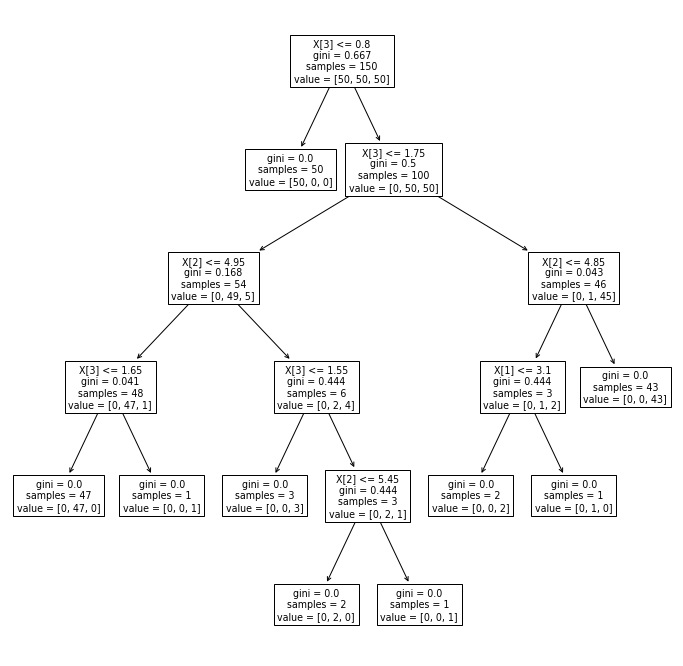

In [242]:
clf = clf.fit(iris.data, iris.target)
plt.figure(figsize = (12,12))
tree.plot_tree(clf)

plt.show();

In [248]:
rfr = RFR(n_estimators = 100, max_depth = 15, criterion = 'mse')
rfr = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_pred,y_test)

0.851883874988805

# GridSearch Cross- Validation 

![](data/grid.png)

![](data/folds.jpg)

In [268]:
from sklearn.model_selection import GridSearchCV

In [277]:
grid_param = { #Son parametros que cambiaran en el modelo y se escojeran los mejores parametros
    'n_estimators':[i for i in range(100,201,10)],
    'criterion':['mse','mae'],
    'max_depth':[10,15,20,25]
}

In [278]:
random_forest_regresion = RFR()
random_forest_grid = GridSearchCV(random_forest_regresion, grid_param)

In [279]:
random_trained = random_forest_grid.fit(X_train,y_train)

In [282]:
random_trained.best_params_

{'criterion': 'mae', 'max_depth': 25, 'n_estimators': 160}

In [307]:
random_forest_regresion_best_params = RFR(criterion ='mae',max_depth= 25, n_estimators = 160 )

In [308]:
rfr = random_forest_regresion_best_params.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_pred,y_test) #Como medida de evaluacion usa MSE media de los errores al cuadrado

0.837657087517468

In [309]:
from sklearn.model_selection import cross_val_score

In [310]:
scores = cross_val_score(random_forest_regresion_best_params, X_test,y_pred, cv = 5)

In [311]:
scores 
#Son los scores de los cambios en la muestra para ver si los parametros son consistentes y el modelo es redundante

array([0.82243076, 0.83842068, 0.89637604, 0.91180778, 0.77543925])

## Regresion Logistica - Se busca un 0-1

In [256]:
churn = pd.read_csv('data/churn.csv') #La data se trata de  personas que dejan un servicio, un trabajo, etc.

In [257]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthLevel', 'TotalLevel', 'TenureLevel', 'ChurnBinary'],
      dtype='object')

In [349]:
churn['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [348]:
churn_s = churn[['gender','SeniorCitizen', 'Partner', 'tenure', 'InternetService', 'Contract','TotalCharges']]

In [334]:
X = churn_s.copy()

In [335]:
X = pd.get_dummies(X)

In [336]:
X

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,1,0,0,1,1,0,0,1,0,0,1,0,0
1,0,34,1889.50,0,1,1,0,1,0,0,0,1,0,0,1,0
2,0,2,108.15,0,1,1,0,1,0,0,1,0,0,1,0,0
3,0,45,1840.75,0,1,1,0,1,0,0,0,1,0,0,1,0
4,0,2,151.65,1,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,1990.50,0,1,0,1,1,0,0,0,1,0,0,1,0
7028,0,72,7362.90,1,0,0,1,0,1,0,0,1,0,0,1,0
7029,0,11,346.45,1,0,0,1,1,0,0,1,0,0,1,0,0
7030,1,4,306.60,0,1,0,1,0,1,0,1,0,0,1,0,0


In [350]:
Y = churn['ChurnBinary']
Y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: ChurnBinary, Length: 7032, dtype: float64

In [338]:
X_train,x_test,Y_train,y_test = tts(X,Y, test_size = 0.2)

In [339]:
from sklearn.linear_model import LogisticRegression

In [340]:
logit_reg = LogisticRegression()

In [341]:
logit_fit = logit_reg.fit(X_train,Y_train)

In [351]:
y_pred = logit_fit.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

# Matriz de confusion

In [346]:
from sklearn.metrics import confusion_matrix

In [353]:
import seaborn as sns

In [359]:
confusion_matrix(y_test,y_pred)
#919 son aquellos que son positivos en la realidad y en la prediccion son positivos (verdaderos - positivos)
#197 son aquellos que son negativos en la realidad y en la prediccion son positivos (falsos - positivos)
#88 son aquellos que son positivos en la realidad y en la prediccion son negativos (falsos - negativos)
#203 son aquellos que son negativos en la realidad y en la prediccion son negativos (Verdaderos - negativos)

array([[919,  88],
       [197, 203]], dtype=int64)

<AxesSubplot:>

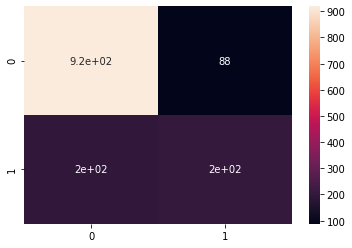

In [358]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)